# cv.split, cv.merge, cv.resize, cv.add, cv.addWeighted, ROI

#### cv.split: 
- This function splits an image into its individual channels (such as Red, Green and Blue) and returns them as separate matrices or a list of matrices

cv.merge: This function merges individual channels into a single image and returns it as a matrix

cv.resize: This function resizes an image to a specified size or scale factor and returns it as a matrix

cv.add: This function calculates the per-element sum of two images or an image and a scalar and returns it as a matrix

cv.addWeighted: This function calculates the weighted sum of two images and returns it as a matrix

ROI: This stands for Region of Interest and refers to a sub-image or a rectangular region within an image that we want to process or extract

In [2]:
import cv2 
import numpy as np 

img1 = cv2.imread('Images/sample1.jpg')
img2 = cv2.imread('Images/sample2.png')

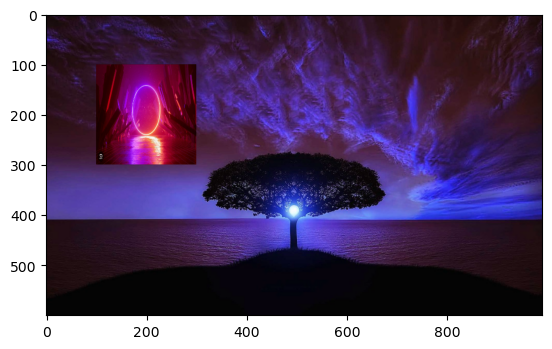

In [15]:
import matplotlib.pyplot as plt 

plt.imshow(img1)
plt.show()

### Splitting and Merging Channels


In [3]:
# Split img1 into its channels
b1, g1, r1 = cv2.split(img1)

# Display the blue channel
cv2.imshow('Blue Channel', b1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# Merge the channels back into an image
img1_merged = cv2.merge((b1, g1, r1))

# Display the merged image
cv2.imshow('Merged Image', img1_merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
# Create an image with only red and green channels
img_rg = cv2.merge((b1*0, g1, r1))

# Display the new image
cv2.imshow('Red and Green Image', img_rg)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Resizing Images

To resize an image, we can use the cv.resize function. 

We can specify either the desired size (width and height) or the scale factor (fx and fy) for both dimensions. 

We can also choose the interpolation method for resizing. 

The default interpolation method is cv.INTER_LINEAR, which is suitable for most cases. 

Some other interpolation methods are cv.INTER_NEAREST, cv.INTER_AREA, cv.INTER_CUBIC and cv.INTER_LANCZOS4

In [11]:
# Resize img2 to half its size
img2_resized = cv2.resize(img2, None, fx=0.5, fy=0.5)

# Display the resized image
cv2.imshow('Resized Image', img2_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
img1 = cv2.resize(img1,(990,600))
img2 = cv2.resize(img2,(990,600))

### Adding Images

To add two images of the same size and type, we can use the cv.add function. 

This function performs a per-element addition of two matrices or a matrix and a scalar. 

For example, to add img1 and img2 together, we can do:

In [8]:
# Add img1 and img2
img_added = cv2.add(img1, img2)

# Display the added image
cv2.imshow('Added Image', img_added)
cv2.waitKey(0)
cv2.destroyAllWindows()


This will display an image that is the result of adding the corresponding pixels of img1 and img2. Note that the pixel values are clipped to the range [0, 255] after the addition, so some information may be lost due to saturation.

### Adding Images with Weights

To add two images with different weights, we can use the `cv.addWeighted` function. 

This function performs a weighted sum of two matrices or a matrix and a scalar. 
- The formula is:
        **dst = src1*alpha + src2*beta + gamma**
        
where alpha and beta are the weights for src1 and src2, and gamma is a scalar added to the sum. 

For example, to create a blended image of img1 and img2 with alpha = 0.7 and beta = 0.3, we can do:

In [81]:
# Add img1 and img2 with weights
img_blended = cv2.addWeighted(img1, 0.2, img2, 0.8, 0)

# Display the blended image
cv2.imshow('Blended Image', img_blended)
cv2.waitKey(0)
cv2.destroyAllWindows()


- This will display an image that is a linear combination of img1 and img2 with different weights.

## Extracting Region of Interest

To extract a region of interest (ROI) from an image, we can use the array slicing syntax of NumPy. For example, to extract a rectangular region from img1 with top-left corner at (100, 100) and bottom-right corner at (300, 300), we can do:

In [17]:
# Extract a region from img1
img_roi = img1[100:300, 100:300]

# Display the region
cv2.imshow('Region of Interest', img_roi)
cv2.waitKey(0)
cv2.destroyAllWindows()


This will display a sub-image of img1 with the specified coordinates. We can also modify or replace the ROI with another image using the same syntax. For example, to replace the ROI of img1 with the resized img2, we can do:

In [14]:
# Replace the region of img1 with resized img2
img1[100:300, 100:300] = cv2.resize(img2, (200, 200))

# Display the modified image
cv2.imshow('Modified Image', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
import cv2

img = cv2.imread('Images/opticalfb.jpg')


In [5]:
img.shape

(582, 418, 3)

In [6]:
img.size

729828

In [7]:
img.dtype

dtype('uint8')

In [11]:
b , g , r = cv2.split(img)

In [14]:
b

array([[ 73,  64,  67, ..., 106, 107, 107],
       [ 70,  77,  92, ..., 108, 103, 103],
       [ 78,  77,  83, ..., 107, 107, 107],
       ...,
       [  0,   0,   0, ...,   3,   5,   5],
       [  0,   0,   0, ...,   3,   5,   5],
       [  0,   0,   0, ...,   3,   5,   5]], dtype=uint8)

In [12]:
img = cv2.merge((b , g , r))

In [13]:
img

array([[[ 73, 120, 118],
        [ 64, 111, 109],
        [ 67, 116, 114],
        ...,
        [106, 112, 107],
        [107, 113, 112],
        [107, 113, 112]],

       [[ 70, 117, 115],
        [ 77, 124, 122],
        [ 92, 141, 139],
        ...,
        [108, 114, 109],
        [103, 109, 108],
        [103, 109, 108]],

       [[ 78, 125, 122],
        [ 77, 124, 121],
        [ 83, 133, 129],
        ...,
        [107, 113, 108],
        [107, 112, 111],
        [107, 112, 111]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   5,   0],
        [  5,   4,   0],
        [  5,   4,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   5,   0],
        [  5,   4,   0],
        [  5,   4,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   5,   0],
        [  5,   4,   0],
        [  5,   4,   0]]

In [17]:
cv2.imshow('image' , img)
cv2.waitKey()
cv2.destroyAllWindows()

## ROI

In [26]:
import cv2 

img = cv2.imread('Images/messi.jpeg')

ball = img[169:102 , 102:106]
# ball = img[45:112 , 80:147]

img[110:43 , 43:47] = ball

cv2.imshow('img' , img)
cv2.waitKey(0)
cv2.destroyAllWindows()

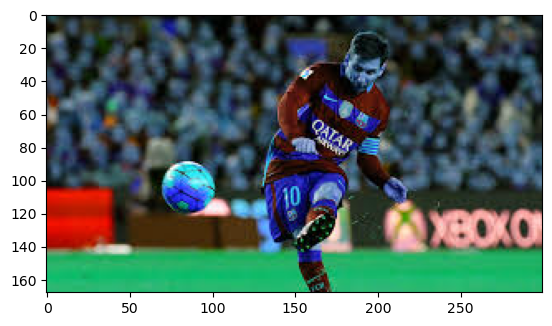

In [20]:
import matplotlib.pyplot as plt 

plt.imshow(img)
plt.show()

# Add 2 img

In [18]:
import cv2 

img1 = cv2.imread('Images/messi3.jpeg')
img2 = cv2.imread('Images/messi4.jpeg')

img1 = cv2.resize(img1,(512,512))
img2 = cv2.resize(img1,(512,512))


dst = cv2.add(img1  , img2);

cv2.imshow('image' , dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Add Weight

In [44]:
import cv2 

img1 = cv2.imread('Images/messi3.jpeg')
img2 = cv2.imread('Images/messi2.jpeg')

img1 = cv2.resize(img1,(512,512))
img2 = cv2.resize(img1,(512,512))


dst = cv2.addWeighted(img1 , .5  , img2 ,.5 , 0 );

cv2.imshow('image' , dst)
cv2.waitKey(0)
cv2.destroyAllWindows()